In [8]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [9]:
np.set_printoptions(threshold=100)

In [31]:
clap_prob=0.3

In [42]:
clap_data=np.random.binomial(n=1,p=clap_prob,size=2000)

In [46]:
clap_data.shape

(2000,)

In [43]:
clap_data.sum()

581

In [44]:
clap_data

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
a= 400
b = 2000 - a 

In [55]:
theta_range= np.linspace(0,1,1000)

In [56]:
theta_range

array([0.      , 0.001001, 0.002002, ..., 0.997998, 0.998999, 1.      ])

In [57]:
prior=stats.beta.pdf(x=theta_range,a=a,b=b)

In [58]:
prior.sum()

998.9999999999509

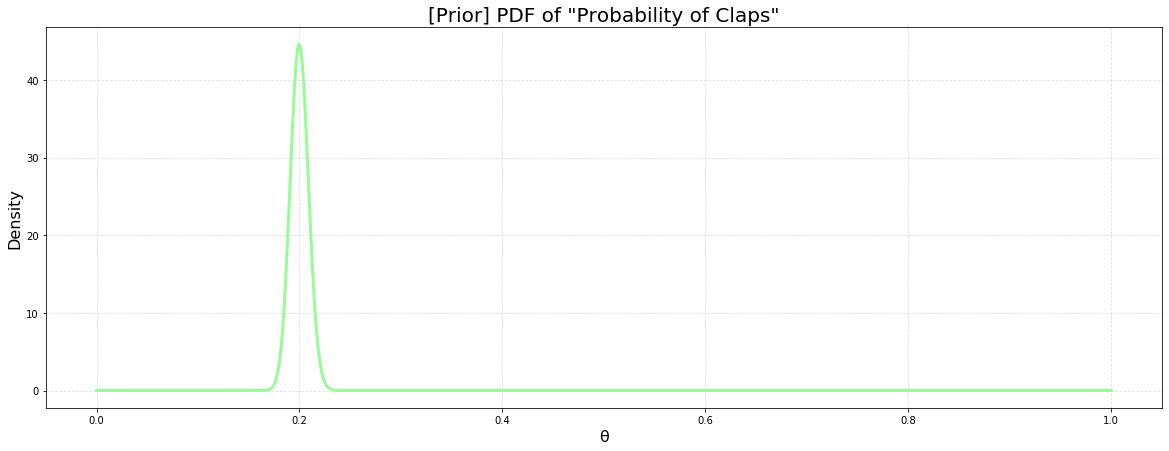

In [59]:
# Plotting the prior distribution
plt.rcParams['figure.figsize'] = [20, 7]
fig, ax = plt.subplots()
plt.plot(theta_range, prior, linewidth=3, color='palegreen')
# Add a title
plt.title('[Prior] PDF of "Probability of Claps"', fontsize=20)
# Add X and y Label
plt.xlabel('θ', fontsize=16)
plt.ylabel('Density', fontsize=16)
# Add a grid
plt.grid(alpha=.4, linestyle='--')
# Show the plot
plt.show()

In [60]:
likelihood = stats.binom.pmf(k=np.sum(clap_data), n = len(clap_data), p = clap_prob)

In [61]:
likelihood

0.012749205656693588

In [21]:
len(clap_data)

2000

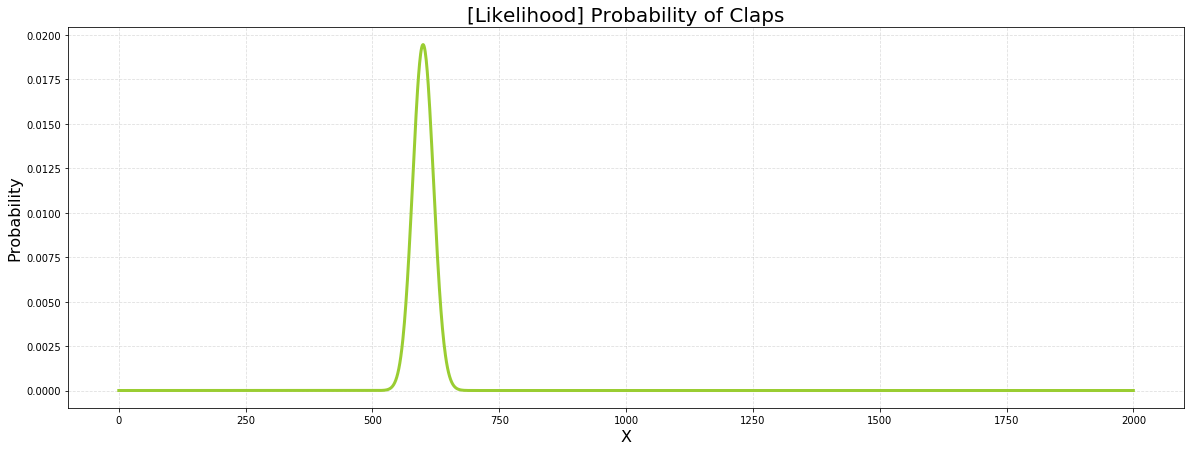

In [64]:
# Domain (# of claps)
X = np.arange(0, len(clap_data)+1)
# Likelihood P(X|θ) for all X's
likelihood = stats.binom.pmf(k = X, n = len(clap_data), p = clap_prob)
# Create the plot
fig, ax = plt.subplots()
plt.plot(X, likelihood, linewidth=3, color='yellowgreen')
# Add a title
plt.title('[Likelihood] Probability of Claps' , fontsize=20)
# Add X and y Label
plt.xlabel('X', fontsize=16)
plt.ylabel('Probability', fontsize=16)
# Add a grid
plt.grid(alpha=.4, linestyle='--')
# Show the plot
plt.show()

In [75]:
theta_range_e = theta_range + 0.001 
prior = stats.beta.cdf(x = theta_range_e, a=a, b=b) - stats.beta.cdf(x = theta_range, a=a, b=b) 
#prior = stats.beta.pdf(x = theta_range, a=a, b=b)
likelihood = stats.binom.pmf(k = np.sum(clap_data), n = len(clap_data), p = theta_range) 
posterior = likelihood * prior 
normalized_posterior = posterior / np.sum(posterior)

In [76]:
prior

array([0., 0., 0., ..., 0., 0., 0.])

In [77]:
prior.sum()

0.9990000000000754

In [82]:
normalized_posterior

array([0., 0., 0., ..., 0., 0., 0.])

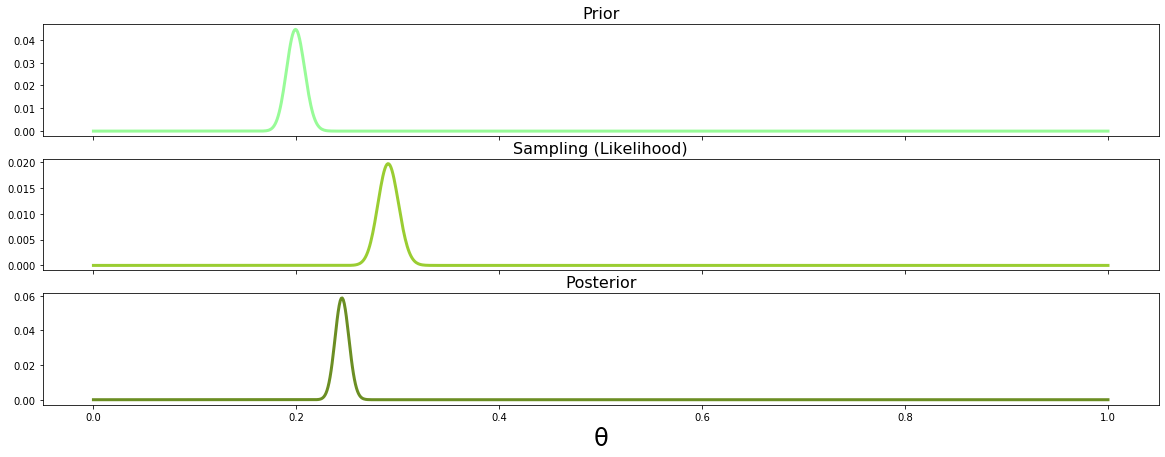

In [81]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(20,7))
plt.xlabel('θ', fontsize=24)
axes[0].plot(theta_range, prior, label="Prior", linewidth=3, color='palegreen')
axes[0].set_title("Prior", fontsize=16)
axes[1].plot(theta_range, likelihood, label="Likelihood", linewidth=3, color='yellowgreen')
axes[1].set_title("Sampling (Likelihood)", fontsize=16)
axes[2].plot(theta_range, normalized_posterior, label='Posterior', linewidth=3, color='olivedrab')
axes[2].set_title("Posterior", fontsize=16)
plt.show()